## GENDER INCOME GAP

you may know that it is estimated that women earn about 78% of men in the same job position. 
Can we test that on NYC income data? Can we turn that into a prediction: if you get hired at a certain stipend as a men, what should you expect to make as a woman? (or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer to a woman job candidate, given what I would offer a man for the same job?)




In [637]:
from __future__ import print_function, division
import sys
import os
import numpy 
import pylab as pl
import pandas as pd

import json
import os
s = json.load( open(os.getenv('PUI2016')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)



%pylab inline

Populating the interactive namespace from numpy and matplotlib


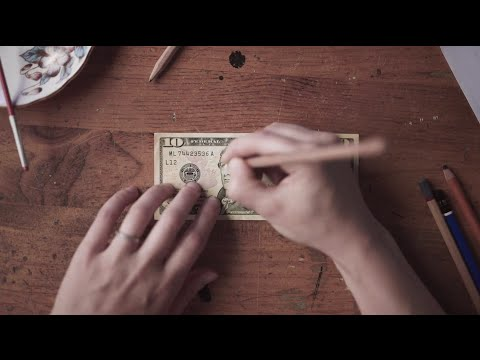

In [638]:
#The gender gap(non mandatory viewing)
from IPython.display import YouTubeVideo
YouTubeVideo("G_ikzQM93W8")

the Census data on income
http://www.census.gov/hhes/www/cpstables/032015/perinc/pinc03_000.htm

I posted the relevant data on the class webpage here : http://cosmo.nyu.edu/~fb55/PUI2016/data

# 1. Create two python dictionaries to store your data. 
```
     allmales = ... 
```
stores the male data
```
    allfemales = ...
```
stores the female data
     
each dictionary needs to have 5 key-pair values with keys:
'all', 'white', 'black', 'hispanic', 'asian'
each value should contain a dataframe read with the pandas read_excel function directly from the url. 

should contain



In [639]:
allmales = {}
allfemales = {}

# the file name root is "pinc_" (common to all files)
## 08_2  are male, 
## 08_3 are female, 
### _1_1 is all ethnicities
### _1_4 is white
### _1_6 is black
### _1_8 is asian
### _1_9 is hispanic
# extension is .xls for all files
put together the link name from this info and load the data on your allmales and allfemales dictionaries

use 1 header row (figure out which one by looking at the output of my 
allfemales['all'].head() and .columns a couple of cel

In [640]:
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"

In [641]:
allmales['all'] = pd.read_excel(url + 'pinc08_2_1_1.xls','pinc08', header=9).set_index(['Characteristic'])
allmales['white'] = pd.read_excel(url + 'pinc08_2_1_4.xls', sheetname='pinc08', header=9).set_index(['Characteristic'])
allmales['black'] = pd.read_excel(url + 'pinc08_2_1_6.xls', sheetname='pinc08', header=9).set_index(['Characteristic'])
allmales['hispanic'] = pd.read_excel(url + 'pinc08_2_1_9.xls', sheetname='pinc08', header=9).set_index(['Characteristic'])
allmales['asian'] = pd.read_excel(url + 'pinc08_2_1_8.xls', sheetname='pinc08', header=9).set_index(['Characteristic'])

allfemales = {}
allfemales['all'] = pd.read_excel(url + 'pinc08_3_1_1.xls', sheetname='pinc08',header=9).set_index(['Characteristic'])
allfemales['white'] = pd.read_excel(url + 'pinc08_3_1_4.xls', sheetname='pinc08', header=9).set_index(['Characteristic'])
allfemales['black'] = pd.read_excel(url + 'pinc08_3_1_6.xls', sheetname='pinc08', header=9).set_index(['Characteristic'])
allfemales['hispanic'] = pd.read_excel(url + 'pinc08_3_1_9.xls', sheetname='pinc08', header=9).set_index(['Characteristic'])
allfemales['asian'] = pd.read_excel(url + 'pinc08_3_1_8.xls', sheetname='pinc08',header=9).set_index(['Characteristic'])


allmales['all'].head(10)

,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999","$20,000 to $22,499",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
Characteristic,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
....Total,108706.0,4407.0,2665.0,3200.0,4027.0,4418.0,3333.0,5027.0,3807.0,5409.0,...,513.0,626.0,457.0,12003.0,35228,211,50779,447,0.501,0.0033
Earnings,83555.0,3217.0,2326.0,2560.0,1964.0,3118.0,1505.0,3451.0,1959.0,4108.0,...,246.0,559.0,259.0,10113.0,39903,437,54086,531,0.489,0.0039
..Wages and Salary,78263.0,2779.0,2184.0,2419.0,1780.0,2777.0,1365.0,3149.0,1847.0,3821.0,...,244.0,540.0,257.0,9392.0,40298,167,54268,543,0.483,0.004
..Nonfarm Self-Employment,7014.0,1478.0,280.0,342.0,231.0,556.0,144.0,377.0,122.0,376.0,...,0.0,18.0,0.0,516.0,19557,1391,34247,1291,0.63,0.0092
..Farm Self-Employment,1518.0,804.0,62.0,66.0,26.0,75.0,15.0,70.0,14.0,82.0,...,0.0,2.0,3.0,83.0,2359,106,20918,2837,0.82,0.0168
Social Security,21454.0,555.0,859.0,919.0,1784.0,2250.0,3063.0,3329.0,3282.0,2278.0,...,0.0,0.0,0.0,0.0,15974,96,15892,86,0.237,0.0028
SSI (Supplemental Security Income),2667.0,298.0,283.0,447.0,1041.0,225.0,126.0,78.0,78.0,39.0,...,0.0,0.0,0.0,0.0,8232,95,8374,174,0.298,0.0113
Public Assistance,456.0,312.0,97.0,30.0,12.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1829,117,2123,236,0.571,0.0275


In [642]:
print(allmales.keys())
print(allfemales.keys())

['hispanic', 'all', 'black', 'white', 'asian']
['hispanic', 'all', 'black', 'white', 'asian']


In [643]:
#allfemales and allmales should be dictionaries
type(allfemales)

dict

In [644]:
# the files are a bit of a mess! 
allfemales['all'].columns

Index([   u'Total with Income', u'$1 to $2,499 or loss',
           u'$2,500 to $4,999',     u'$5,000 to $7,499',
           u'$7,500 to $9,999',   u'$10,000 to $12,499',
         u'$12,500 to $14,999',   u'$15,000 to $17,499',
         u'$17,500 to $19,999',   u'$20,000 to $22,499',
         u'$22,500 to $24,999',   u'$25,000 to $27,499',
         u'$27,500 to $29,999',   u'$30,000 to $32,499',
         u'$32,500 to $34,999',   u'$35,000 to $37,499',
         u'$37,500 to $39,999',   u'$40,000 to $42,499',
         u'$42,500 to $44,999',   u'$45,000 to $47,499',
         u'$47,500 to $49,999',   u'$50,000 to $52,499',
         u'$52,500 to $54,999',   u'$55,000 to $57,499',
         u'$57,500 to $59,999',   u'$60,000 to $62,499',
         u'$62,500 to $64,999',   u'$65,000 to $67,499',
         u'$67,500 to $69,999',   u'$70,000 to $72,499',
         u'$72,500 to $74,999',   u'$75,000 to $77,499',
         u'$77,500 to $79,999',   u'$80,000 to $82,499',
         u'$82,500 to $84,999',

In [645]:
allfemales.items()

[('hispanic',
                                                      Total with Income  \
  Characteristic                                                          
  NaN                                                               NaN   
  ....Total                                                     14034.0   
  Earnings                                                      10549.0   
  ..Wages and Salary                                            10119.0   
  ..Nonfarm Self-Employment                                       567.0   
  ..Farm Self-Employment                                           58.0   
  Social Security                                                2038.0   
  SSI (Supplemental Security Income)                              612.0   
  Public Assistance                                               412.0   
  Veterans Benefits                                                52.0   
  Survivor Benefits                                                89.0   
  Disabilit

# Descriptive phase: 


In [646]:
# just run this cell to get an idea of the data
for k,v in allfemales.items():
    print("pri", k)
    print(v.describe())
for k,v in allmales.items():
    print("#####", k)
    print(v.describe())

pri hispanic
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean         1908.739130            274.282609        137.717391   
std          3688.718088            568.547923        199.157298   
min             1.000000              0.000000          0.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max         14034.000000           2704.000000        783.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         154.043478        188.913043          175.173913   
std          259.111813        321.948569          341.577016   
min            0.000000          0.000000            0.000000   
25%                 NaN               NaN        

# 2. Exploratory phase
## at this point it is a good idea to see if we can plot some data.
## pandas has a nifty function scatter_matrix which plots every numerical column against the other. 
## however there are a lot of non-real values in these DataFrames so running pd.scatter_matrix(allmales['asian']) for example would fail. You can try!

In [647]:
allmales['all'].keys()

Index([   u'Total with Income', u'$1 to $2,499 or loss',
           u'$2,500 to $4,999',     u'$5,000 to $7,499',
           u'$7,500 to $9,999',   u'$10,000 to $12,499',
         u'$12,500 to $14,999',   u'$15,000 to $17,499',
         u'$17,500 to $19,999',   u'$20,000 to $22,499',
         u'$22,500 to $24,999',   u'$25,000 to $27,499',
         u'$27,500 to $29,999',   u'$30,000 to $32,499',
         u'$32,500 to $34,999',   u'$35,000 to $37,499',
         u'$37,500 to $39,999',   u'$40,000 to $42,499',
         u'$42,500 to $44,999',   u'$45,000 to $47,499',
         u'$47,500 to $49,999',   u'$50,000 to $52,499',
         u'$52,500 to $54,999',   u'$55,000 to $57,499',
         u'$57,500 to $59,999',   u'$60,000 to $62,499',
         u'$62,500 to $64,999',   u'$65,000 to $67,499',
         u'$67,500 to $69,999',   u'$70,000 to $72,499',
         u'$72,500 to $74,999',   u'$75,000 to $77,499',
         u'$77,500 to $79,999',   u'$80,000 to $82,499',
         u'$82,500 to $84,999',

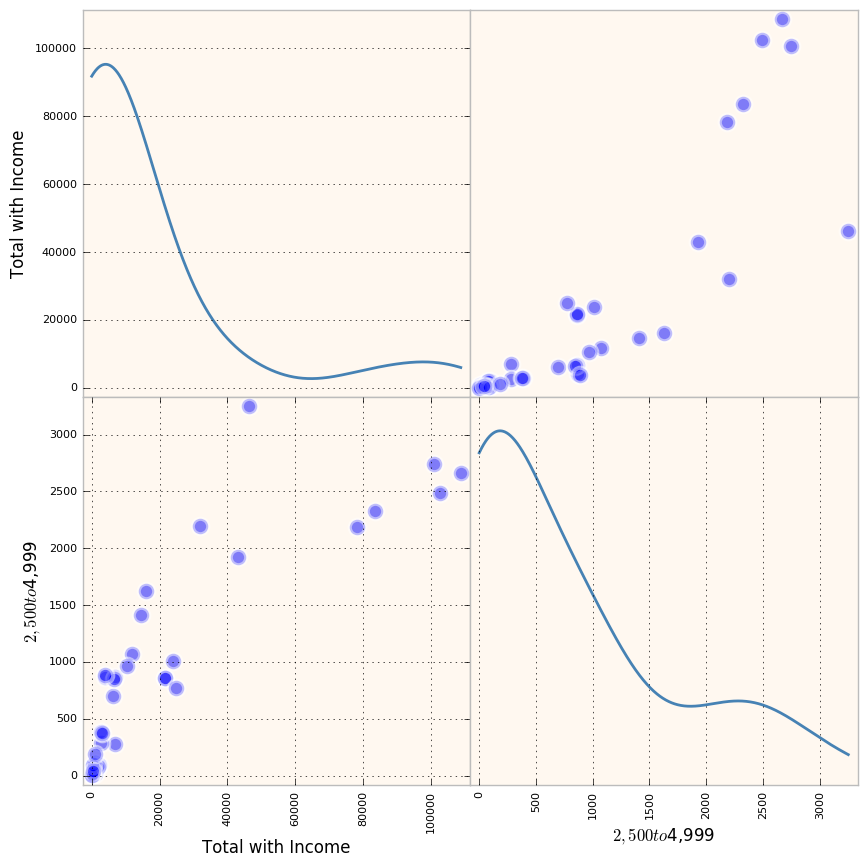

In [648]:
# only columns containing real numerical values 
# are plotted with scatter_matrix. 
# But we are interested in median income but it wont get plotted, 
# due to bad values in the column

fig = pd.scatter_matrix(allmales['all'][[u'Total with Income',u'$2,500 to $4,999',u'Median income',u'Gini ratio']],
                        linewidth= 3, s=500, figsize=(10,10), 
                        diagonal='kde')                

In [649]:
#the rel values in the Median income row are fewer than the number of rows
print (allmales['asian'].shape)
allmales['asian'].applymap(np.isreal).sum()


(49, 48)


Total with Income       49
$1 to $2,499 or loss    49
$2,500 to $4,999        49
$5,000 to $7,499        49
$7,500 to $9,999        49
$10,000 to $12,499      49
$12,500 to $14,999      49
$15,000 to $17,499      49
$17,500 to $19,999      49
$20,000 to $22,499      49
$22,500 to $24,999      49
$25,000 to $27,499      49
$27,500 to $29,999      49
$30,000 to $32,499      49
$32,500 to $34,999      49
$35,000 to $37,499      49
$37,500 to $39,999      49
$40,000 to $42,499      49
$42,500 to $44,999      49
$45,000 to $47,499      49
$47,500 to $49,999      49
$50,000 to $52,499      49
$52,500 to $54,999      49
$55,000 to $57,499      49
$57,500 to $59,999      49
$60,000 to $62,499      49
$62,500 to $64,999      49
$65,000 to $67,499      49
$67,500 to $69,999      49
$70,000 to $72,499      49
$72,500 to $74,999      49
$75,000 to $77,499      49
$77,500 to $79,999      49
$80,000 to $82,499      49
$82,500 to $84,999      49
$85,000 to $87,499      49
$87,500 to $89,999      49
$

In [650]:
# there are a lot of non-real values that make the analysis hard.
# Converting non-real values to real values using pd.to_numeric

for gender in [allmales, allfemales]:
    for i in gender:
        gender[i]= gender[i].ix[:,0:].apply(pd.to_numeric, errors='coerce')


allmales['asian']

,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999","$20,000 to $22,499",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
Characteristic,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
....Total,5752.0,230.0,146.0,227.0,195.0,216.0,193.0,225.0,218.0,171.0,...,32.0,40.0,23.0,904.0,40153.0,1469.0,58236.0,1786.0,0.519,0.0110
Earnings,4716.0,137.0,135.0,132.0,82.0,136.0,109.0,157.0,122.0,141.0,...,28.0,28.0,21.0,843.0,45926.0,1619.0,63799.0,2008.0,0.490,0.0119
..Wages and Salary,4482.0,126.0,124.0,129.0,83.0,127.0,104.0,145.0,113.0,129.0,...,28.0,28.0,20.0,819.0,45950.0,1927.0,64304.0,2042.0,0.490,0.0124
..Nonfarm Self-Employment,303.0,58.0,13.0,11.0,2.0,12.0,4.0,16.0,5.0,5.0,...,0.0,0.0,0.0,24.0,30916.0,5465.0,41394.0,6079.0,0.571,0.0433
..Farm Self-Employment,43.0,32.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,5.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
Social Security,659.0,6.0,31.0,44.0,77.0,102.0,63.0,93.0,89.0,65.0,...,0.0,0.0,0.0,0.0,15120.0,735.0,15189.0,471.0,0.253,0.0120
SSI (Supplemental Security Income),106.0,1.0,13.0,20.0,44.0,9.0,8.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,8598.0,412.0,9481.0,796.0,0.260,0.0314
Public Assistance,29.0,13.0,9.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


# now you can plot the dataframe values with a scatter plot 
 just like I tried to do above
 please plot is and write a DESCRIPTIVE caption for the plot in a cell below it

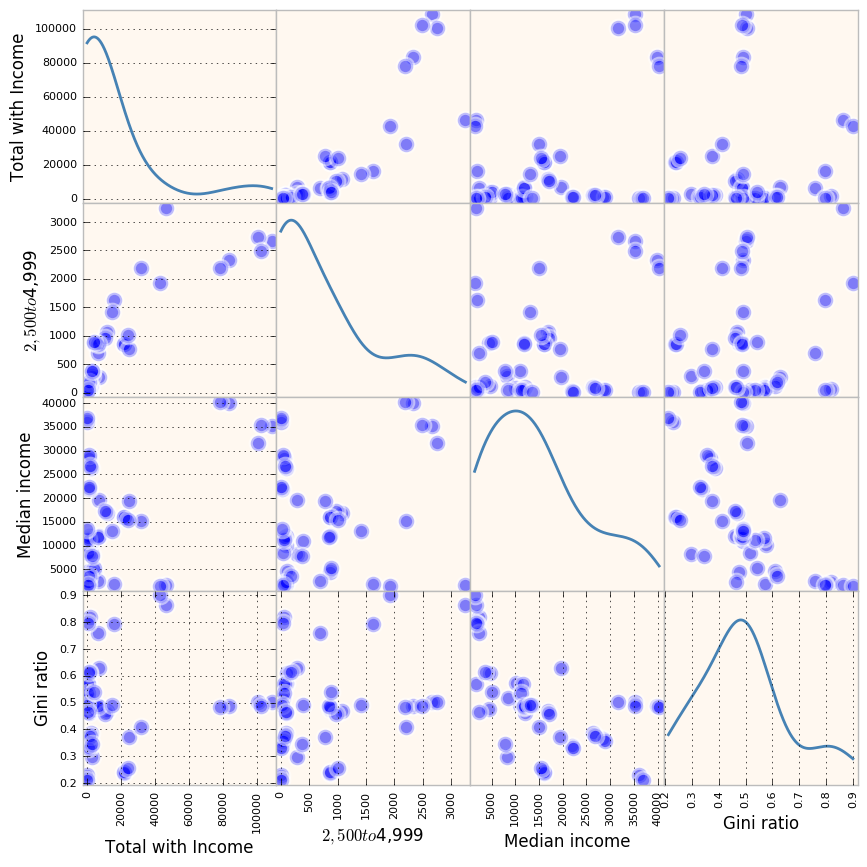

In [651]:
fig = pd.scatter_matrix(allmales['all'][[u'Total with Income',u'$2,500 to $4,999',u'Median income',u'Gini ratio']],
                        linewidth= 3, s=500, figsize=(10,10), 
                        diagonal='kde') 

In [341]:
# do the same for all female

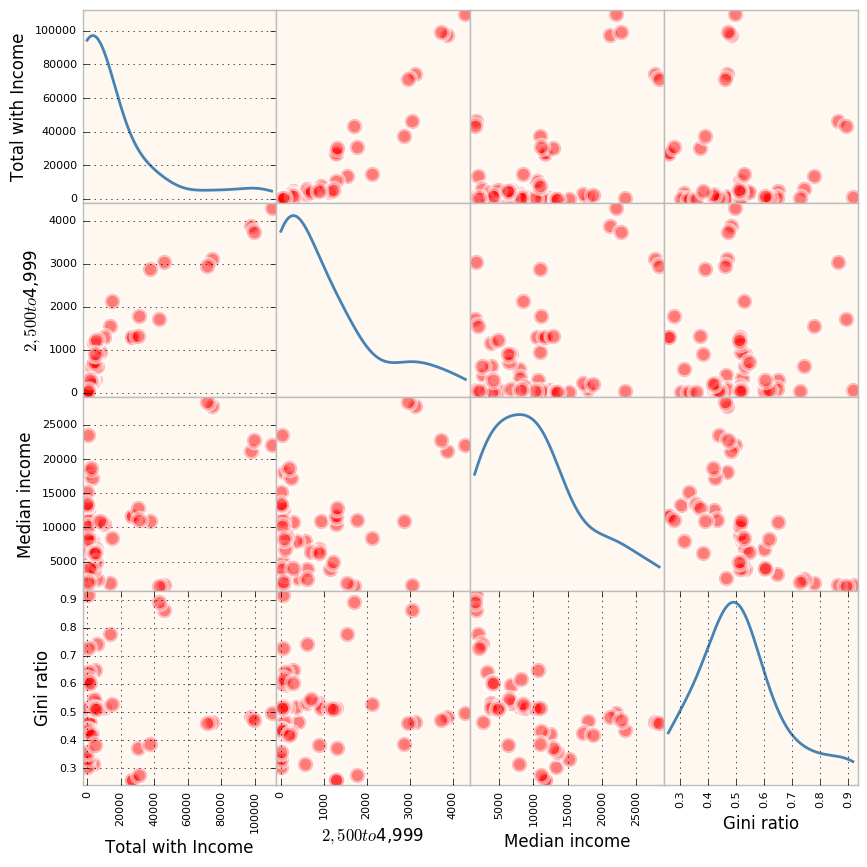

In [652]:
fig = pd.scatter_matrix(allfemales['all'][[u'Total with Income',u'$2,500 to $4,999',u'Median income',u'Gini ratio']],
                        linewidth= 3, s=500, figsize=(10,10), 
                        diagonal='kde', c = 'red') 

## 3. to see how the male and female income relate to each other plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males, race by race (one data point per race)

## also plot the 1-1 line: the diagonal that corresponds to men and women getting the same pay

(make the plot and describe it in a "caption" in the cell below the plot)

In [653]:
allmales['all'][u'Median income'][1]


35228.0

Races are :  ['hispanic', 'all', 'black', 'white', 'asian']
Medium Incomes Male :  [25411.0, 35228.0, 24855.0, 40122.0, 40153.0]
Medium Incomes Female :  [17762.0, 22063.0, 20044.0, 23780.0, 24840.0]


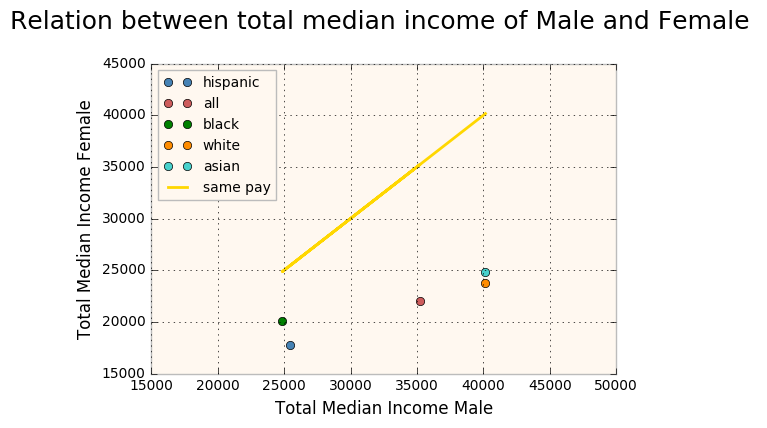

In [654]:
##plotting the Total median incame by race
##pl.scatter...
Med_incomesM= []
Med_incomesF= []
for i in range(5): 
    y = allmales.items()[i][1][u'Median income'][1]
    x = allfemales.items()[i][1][u'Median income'][1]
    pl.plot(y,x, 'o', label = allmales.items()[i][0] )
    Med_incomesF.append(x)
    Med_incomesM.append(y)
    
print("Races are : ", allmales.keys())            
print('Medium Incomes Male : ', Med_incomesM)
print('Medium Incomes Female : ', Med_incomesF)

pl.xlim(15000,50000)
pl.xlabel("Total Median Income Male")
pl.ylabel("Total Median Income Female")
pl.title("Relation between total median income of Male and Female \n", size = 18)
pl.plot(Med_incomesM,Med_incomesM, label='same pay')
pl.legend(loc = 'upper left')

###   <center>    Fig1 :   Total Median Income for Male and Female and the line plotted to show equal pay for both. </center>

# 4. Now fit the data with a line.
### you can use statsmodels, or scipy, numpy, or create your own residual minimization function. 
### Below are steps on how to do this with numpy. Statsmodels requires fewer steps, and you are welcome to use that package. Numpy is less of a black box, so you would learn more taking yourself through the exercise. but you will be graded on the succesful fit, however you choose to perform it.

Steps to use numpy (and you do not have to!) you can for example use 

pl.plot(newx, np.poly1d(np.ployfit(x, y, 1))(newx)

to make and plot the fit in one line (although this way you did not save the parameters so you need to rerun the function to get the slope and intercept ... :-/

why not challenge yourself (if you want) and  create your own residual minimization function you can minimize it with scipy instead of a nested for loop (which is called 'brute force minimization')!

from scipy.optimize import minimize

def line ().....
    #this would be a function that creates a line given parameters, 
    #like we did in class
    ...
    return y

def residuals(data, model, error=None):
    #you can add errors if you want
    you want to return the sum of the residuals 
    #(difference b/w data and model **2)
    return residuals

You need an initial guess for the parameters, where you start searching. It has to be a single variable, so for 2 parameters (a and b for a line) you need to make make a list (or array or tuple) of 2 elements. The numbers inside do not have to be 0 and 1 like I have below - but choose something not too crazy or your minimization will get lost!

p0 = [0,1] 

then run: 

result = minimize(residuals, p0, args=(all_males, all_females))

in args I put all arguments of the function residuals that are not to be evaluated for the minimization (in this case the data)

predicted values by Regression Model :  [ 16322.03580834  22627.70758554  15964.90496306  25771.22981001
  25791.1417816 ]
predicted values by regression model :  [ 0.64232166]
Results  LinregressResult(slope=0.35314068346940902, intercept=9989.8444083919057, rvalue=0.93982358317844372, pvalue=0.017559570692699086, stderr=0.07411994131634865)


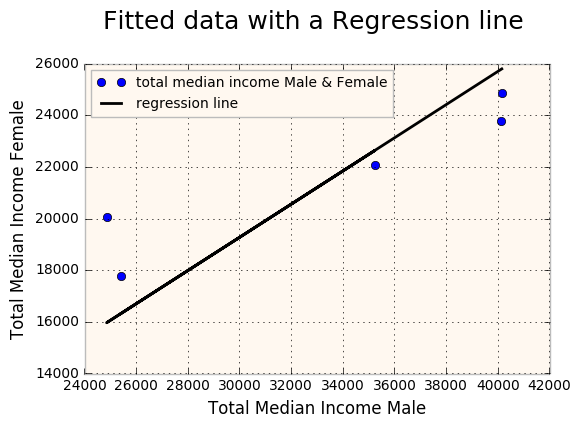

In [655]:
import statsmodels.api as sm
regress = sm.OLS(np.array(Med_incomesF), np.array(Med_incomesM)).fit()
print("predicted values by Regression Model : ", regress.predict())
print("predicted values by regression model : ", regress.params)
print("Results ",stats.linregress(Med_incomesM,Med_incomesF)) #gives you slope, intercept, rvalue
pl.plot(Med_incomesM, Med_incomesF, 'bo', label = 'total median income Male & Female')
pl.plot(Med_incomesM, regress.predict(), 'k-', label = 'regression line')
pl.xlabel("Total Median Income Male")
pl.ylabel("Total Median Income Female")
pl.title("Fitted data with a Regression line \n", size = 18)
pl.legend(loc = 'upper left')


###  Fig2: total median income Male & Female with a fitted line

In [656]:
regress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     395.4
Date:                Mon, 10 Oct 2016   Prob (F-statistic):           3.77e-05
Time:                        13:14:49   Log-Likelihood:                -45.545
No. Observations:                   5   AIC:                             93.09
Df Residuals:                       4   BIC:                             92.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.6423      0.032     19.885      0.000         0.553     0.732
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.657
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.564
Skew:                           0.680   Prob(JB):                        0.754
Kurtosis:                       2.072   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## there is an analytical solution for the OLS (ordinary least square) regression which is coded below. please try to read the code and understand the formula! 


In [657]:
#this is the analytical best regression line. 
# it can be proved (ask me about it if you want!)
# run the cell below to get the beta0 and beta1 values
Med_incomesF= np.array(Med_incomesF)
Med_incomesM = np.array(Med_incomesM)
cor = stats.spearmanr(Med_incomesM, Med_incomesF)
beta1 = cor[0] * Med_incomesF.std() / Med_incomesM.std()
beta0 = Med_incomesF.mean() - beta1 * Med_incomesM.mean()
beta0, beta1

(10485.951073192851, 0.33817688852581446)

## remake the scatter plot, with your line fit as well as the analytical solution to compare that with the result of your numerical one (remember: a line is y = beta0 + beta1 * x)

[ 25411.  35228.  24855.  40122.  40153.]


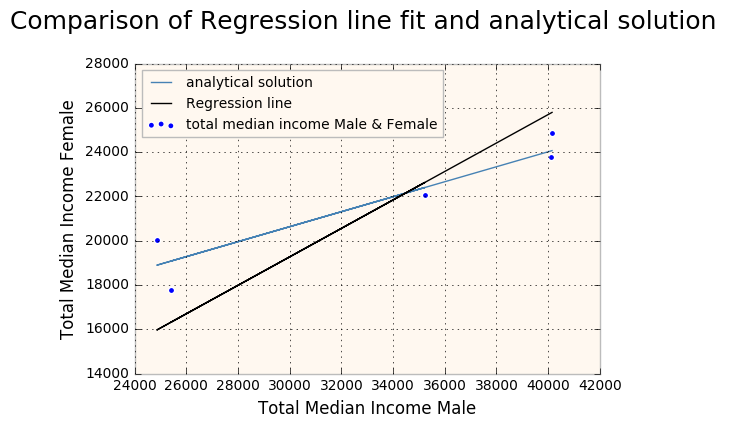

In [658]:
#...

# all_males = np.delete(all_males, [0])
# all_females = np.delete(all_females, [0])

anal_sol = beta0 + (beta1 * Med_incomesM)
print(Med_incomesM)
pl.scatter(Med_incomesM, Med_incomesF, label = 'total median income Male & Female')
pl.plot(Med_incomesM, anal_sol, lw = 1, label = "analytical solution")
pl.plot(Med_incomesM, regress.predict(), 'k-', lw = 1, label = 'Regression line')
pl.xlabel("Total Median Income Male")
pl.ylabel("Total Median Income Female")
pl.title("Comparison of Regression line fit and analytical solution \n", size= 18)
pl.legend(loc = 'upper left')

###       Fig3: Analytical Solution vs Regression line

# 5. this was done with THE TOTAL MEDIAN INCOME, let's now see if all forms of income lead to a different fit. 

We only did this for the Total Median Income, but the file contained income from many sources, which were stored in the Characteristics column.
Use one data point for each source of income (each Characteristics) choosing the 'Median income' for that source and fit a line to those data. The line fit should similar then the previous fit if the Total median income was representative for all forms of income included in this analysis.

To unravel the data and concatenate them back together in a single array is a little complex; 
here are a few lines of code that should do the trick ( this is just what I came up with. If you have something better please share!!)

I used np.concatenate to put together arrays (it takes a list of arrays) and np.flatten to make the array 1 dimensional after merging. I also want to maske the nan values (many functions do not deal well with them). I do that "broadcasting":  using an array of Bools indeces to select the non nan values. Where the array of Bools is True the value is selected, where it is False it is not: e.g.

In [134]: a = np.arange(5)

In [135]: abol = a>2

In [136]: abol
Out[136]: array([False, False, False,  True,  True], dtype=bool)

In [137]: a[abol]
Out[137]: array([3, 4])

Results  LinregressResult(slope=0.60902052361748882, intercept=1493.0394411446359, rvalue=0.92699005065813234, pvalue=7.2128502068483759e-77, stderr=0.018575105164838207)
beat0:  1293.76404877
beta1:  0.62234483904


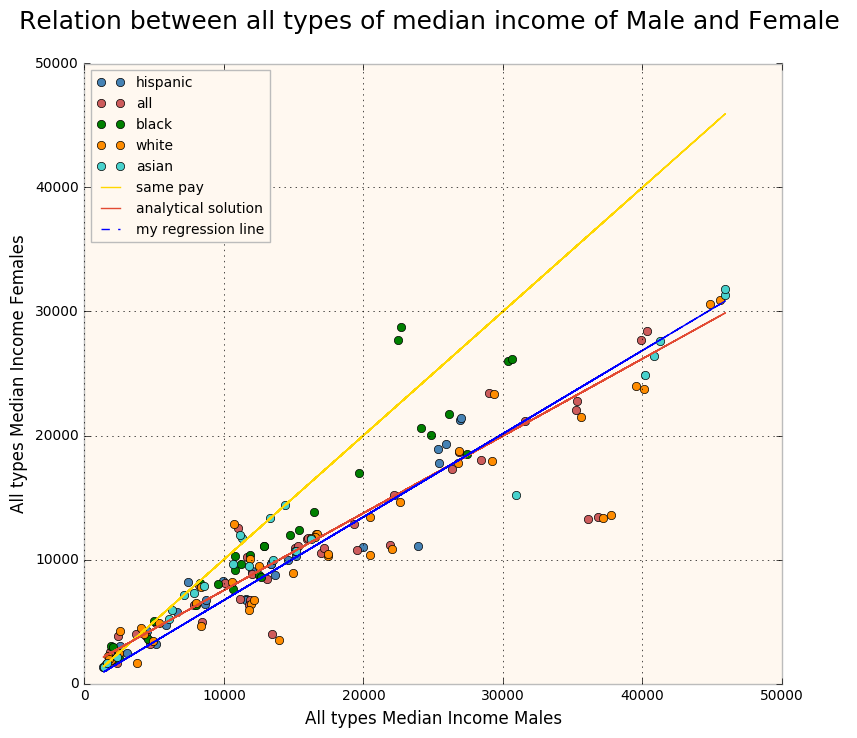

In [622]:
#Comparison of all type of median income of MAle and Female
all_males_allincomes = []
all_females_allincomes = []
pl.figure(figsize = (9,8))

for i in range(5): 
    m = allmales.items()[i][1][u'Median income'][:].values
    f = allfemales.items()[i][1][u'Median income'][:].values
    mask = ~(np.isnan(m) + np.isnan(f))
    pl.plot(m[mask],f[mask], 'o', label = allmales.items()[i][0] )
    all_males_allincomes.extend(m[mask])
    all_females_allincomes.extend(f[mask])
    
#OLS Regression line
regress1 = sm.OLS(all_females_allincomes, all_males_allincomes).fit()
print("Results ",stats.linregress(all_males_allincomes,all_females_allincomes))


#Analytical solution    
all_males_allincomes= np.array(all_males_allincomes)
all_females_allincomes = np.array(all_females_allincomes)
cor = stats.spearmanr(all_males_allincomes, all_females_allincomes)
beta1 = cor[0] * all_females_allincomes.std() / all_males_allincomes.std()
beta0 = all_females_allincomes.mean() - beta1 * all_males_allincomes.mean()
print("beat0: ", beta0)
print("beta1: ", beta1)

anal_sol = beta0 + (beta1 * all_males_allincomes)

#Plotting all the solutions
pl.xlim(0,50000)
pl.xlabel("All types Median Income Males")
pl.ylabel("All types Median Income Females")
pl.title("Relation between all types of median income of Male and Female \n", size = 18)
pl.plot(all_males_allincomes,all_males_allincomes, label='same pay',lw=1)
pl.plot(all_males_allincomes, anal_sol, lw = 1, label = "analytical solution")
pl.plot(all_males_allincomes, regress1.predict(),'b--', label = 'my regression line',lw=1)
pl.legend(loc = 'upper left')

## fig4: Comparison between all types of median Income of male and female and plotted lines with different solutions

In [82]:
##this was my final plot. yours do not have to look like this, 
# this is just an example for your convenience.

# 6. PREDICTION


## Now pick a stipend (maybe your ideal stipend).
## and predict what a woman in a position where a man recieves your ideal stipend would make



In [659]:
m_income = 50000  #picked the stipend
print("predicted  stipend for a woman: " ,regress.predict(np.array(m_income))) #used the regression to find the predicted value

predicted  stipend for a woman:  [ 32116.08320873]


# 7. lastly do you have any comments about what these data tell us about race? 
how you would go about analyzing race differences with these data? (just a few sentences)

In [634]:
print( "Races are : " , (allmales.keys())) 
print('Medium Incomes Male : ', (Med_incomesM))
print('Medium Incomes Female : ', (Med_incomesF))

Races are :  ['hispanic', 'all', 'black', 'white', 'asian']
Medium Incomes Male :  [25411.0, 35228.0, 24855.0, 40122.0, 40153.0]
Medium Incomes Female :  [17762.0, 22063.0, 20044.0, 23780.0, 24840.0]


### Analyzing the data for total median income of different Races : 

The maximum difference in income of men and women is for "Whites". 

In general "Asians" have maximum total median income while "Black" have the minimum total median income among all. However for

proper analysis we need to consider the various sources, the social incomes(eg. social security, Unemployment compensation, etc)

may be an influential factors for the race income distribution.,  So, to conclude:

1) Males: Asian > White > Hispanic > Black

2) Females: Asian > White > Black > Hispanic